In [36]:
import numpy as np

fs = 1000 # 1 kHz sampling frequency
F1 = 10 # First signal component at 10 Hz
F2 = 60 # Second signal component at 60 Hz
T = 10 # 10s signal length
N0 = -10 # Noise level (dB)

N1 = -20  # First Peak level (dB)

t = np.r_[0:T:(1/fs)] # Sample times

# Two Sine signal components at frequencies F1 and F2.
signal = np.sin(2 * F1 * np.pi * t)* 10**(N1/20.0)  + np.sin(2 * F2 * np.pi * t) 

# White noise with power N0
signal += np.random.randn(len(signal)) * 10**(N0/20.0) 

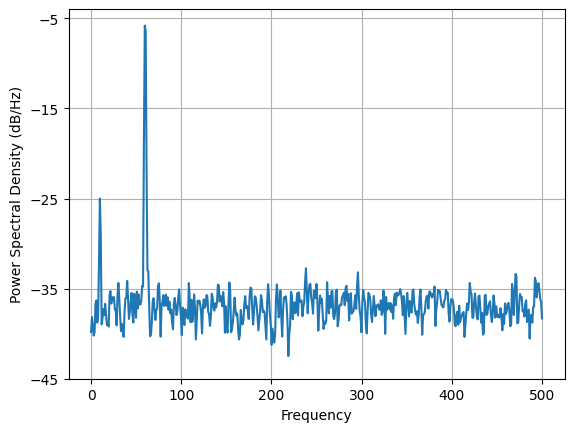

In [37]:
import matplotlib.pyplot as plt

psd_values, frequencies = plt.psd(signal, NFFT=1024, Fs=fs)

In [38]:
import scipy.signal

# f contains the frequency components
# S is the PSD
(f, S) = scipy.signal.periodogram(signal, fs, scaling='density')

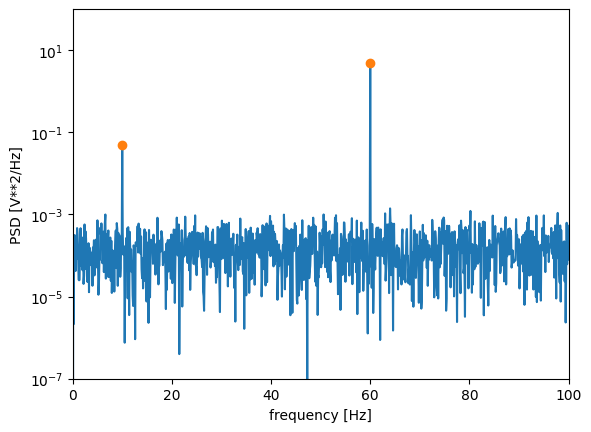

In [39]:
import matplotlib.pyplot as plt
import math

plt.semilogy(f, S)
plt.ylim([1e-7, 1e2])
plt.xlim([0,100])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')

tr = 0.01

peaks, properties = scipy.signal.find_peaks(S, threshold=tr)
plt.plot([p//10 for p in peaks], S[peaks], "o")

plt.show()

## Welch's method PSD estimation (get peaks only for 0-20)

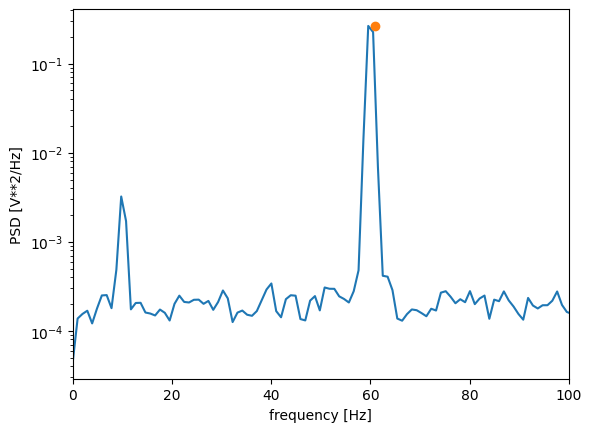

[61]


In [40]:
(f1, S1)= scipy.signal.welch(signal, fs, nperseg=1024)

plt.semilogy(f1, S1)
plt.xlim([0, 100])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')

peaks1, properties1 = scipy.signal.find_peaks(S1, threshold=tr)
plt.plot(peaks1, S1[peaks1], "o")

plt.show()


print(peaks1)



In [41]:
tr = 0.01 # Попугай

trdb = 10*math.log10(tr)


DB = -25

tr = 10**(DB/10)

print("-10dB в попугай: ", tr)
print("попгуай в dB", trdb)



-10dB в попугай:  0.0031622776601683794
попгуай в dB -20.0


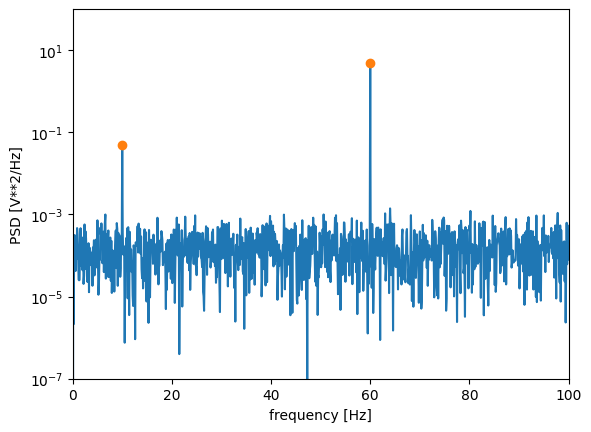

[10, 60] [-13.144250848181834, 6.998171028855628]


In [42]:
(f, S) = scipy.signal.periodogram(signal, fs, scaling='density')

plt.semilogy(f, S)
plt.ylim([1e-7, 1e2])
plt.xlim([0,100])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')

peakFreq = [p//10 for p in peaks]
freqPow = [10*math.log10(z) for z in S[peaks]]

# tr = 0.00316 == -10dB
peaks, properties = scipy.signal.find_peaks(S, threshold=tr)
plt.plot(peakFreq, S[peaks], "o")

plt.show()

print(peakFreq, freqPow)

In [43]:
if 60 in peakFreq:
    pw = freqPow[peakFreq.index(60)]
    print('815 MHz is active! ', pw, 'dB')
    
    
    
    

815 MHz is active!  6.998171028855628 dB
